In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a python script that predicts the labels in serial

In [4]:
%%file serial_script.py

from classification import nearest_neighbor_prediction
import numpy as np

# Load data
train_images = np.load('./data/train_images.npy')
train_labels = np.load('./data/train_labels.npy')
test_images = np.load('./data/test_images.npy')

# Predict the results and save it to a file
test_labels = nearest_neighbor_prediction( test_images, train_images, train_labels )
np.save('data/test_labels_serial.npy', test_labels )

Overwriting serial_script.py


In [5]:
%time !python serial_script.py

CPU times: user 181 ms, sys: 53 ms, total: 234 ms
Wall time: 12.2 s


# Create a python script that finds the labels in parallel

In [6]:
%%file parallel_script.py

from classification import nearest_neighbor_prediction
import numpy as np
from mpi4py.MPI import COMM_WORLD as communicator

# Load data
train_images = np.load('./data/train_images.npy')
train_labels = np.load('./data/train_labels.npy')
test_images = np.load('./data/test_images.npy')

# Use only the data that this rank needs
N_test = len(test_images)
if communicator.rank == 0:
    i_start = 0
    i_end = N_test/2
elif communicator.rank == 1:
    i_start = N_test/2
    i_end = N_test    
test_images = test_images[i_start:i_end]

# Predict the results and save it to a file
test_labels = nearest_neighbor_prediction( test_images, train_images, train_labels )
np.save('./data/test_labels_parallel_%d.npy' %communicator.rank, test_labels )

Overwriting parallel_script.py


In [7]:
%time !mpirun -np 2 python parallel_script.py

CPU times: user 174 ms, sys: 46.4 ms, total: 221 ms
Wall time: 8.4 s


# Check the results 

In [8]:
def plot_random_image( images, labels=None ):
    i = np.random.randint(len(images))
    image = images[i].reshape((28, 28))
    plt.imshow( image, cmap='Greys' )
    if labels is not None:
        plt.title('Label: %d' %labels[i])

In [9]:
test_images = np.load('./data/test_images.npy')
test_labels = np.load('./data/test_labels_serial.npy')

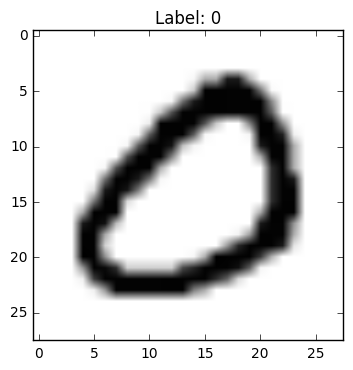

In [10]:
plot_random_image( test_images, test_labels )